# Tensorflow实现多变量线性回归

## 1 数据导入和处理
### 导入相关库

In [1]:
%matplotlib inline

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

### 数据集简介
- 本数据集包含与波士顿房价相关的金工个因素
- CRIM：城镇人均犯罪率
- ZN：住宅地超过25000 sq.ft.的比例
- INDUS：城镇非零售商用土地的比例
- CHAS：Charles河空变量（如果边界是河流，则为1;否则，为0）
- NOX：一氧化氮浓度
- RM：住宅平均房间数
- AGE：1940年之前建成的自用房屋比例
- DIS：到波士顿5个中心区域的加权距离
- RAD：辐射性公路的靠近指数]
- TAX：每1万美元的全值财产税率
- PTRATIO：城镇师生比例
- LSTAT：人口中地位低下者的比例
- MEDV：自住房的产均房价，单位：千美元

### 数据集以CSV格式存储，可通过Pandas库读取开进行格式转换
- Pandas库 可以帮助我们快速读取常规大小的数据文件
- 能够读取CVS文件，文本文件、MS Excel、SQL数据库以及用于科学用途的HDF5格式文件
- 自动转为Numpy的多维阵列

### 通过Pandas导入数据

In [2]:
# 读取数据文件
df = pd.read_csv("/Users/lumin/Documents/dataset/boston_data/boston.csv", header=0)

#显示数据摘要描述信息
print(df.describe())

             CRIM         ZN       INDUS         CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534   12.653063   
std     28.148861    2.1057

In [3]:
#显示所有信息
print(df)

        CRIM   ZN   INDUS   CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0    2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0    7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0    7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0    2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0    2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...     ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0   11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0   11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0   11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0   11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0   11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO  LSTAT  MEDV  
0       15.3   4.98  24.0  
1       17.8   9.14  21.6  
2       17.8   4.03  34.7  

### 载入本示例所需数据

In [4]:
#获取df的值
df = df.values
print(df)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 4.9800e+00 2.4000e+01]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 9.1400e+00 2.1600e+01]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 4.0300e+00 3.4700e+01]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 5.6400e+00 2.3900e+01]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 6.4800e+00 2.2000e+01]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 7.8800e+00 1.1900e+01]]


In [5]:
#把df转换为np数组
df = np.array(df)
print(df)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 4.9800e+00 2.4000e+01]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 9.1400e+00 2.1600e+01]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 4.0300e+00 3.4700e+01]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 5.6400e+00 2.3900e+01]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 6.4800e+00 2.2000e+01]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 7.8800e+00 1.1900e+01]]


### 特征数据归一化

In [6]:
# 对特征数据[0到11]列做（0-1）归一化
for i in range(12):
    df[:,i] = df[:,i] / (df[:,i].max()-df[:,i].min())

In [7]:
# x_data 为前12列特征数据
x_data = df[:,:12]

# y_data 为最后1列标签数据
y_data = df[:,12]

In [8]:
print(x_data,"\n shape=", x_data.shape)
print(y_data,"\n shape=", y_data.shape)

[[7.10352762e-05 1.80000000e-01 8.46774194e-02 ... 5.64885496e-01
  1.62765957e+00 1.37417219e-01]
 [3.06957815e-04 0.00000000e+00 2.59164223e-01 ... 4.61832061e-01
  1.89361702e+00 2.52207506e-01]
 [3.06733020e-04 0.00000000e+00 2.59164223e-01 ... 4.61832061e-01
  1.89361702e+00 1.11203091e-01]
 ...
 [6.82927750e-04 0.00000000e+00 4.37316716e-01 ... 5.20992366e-01
  2.23404255e+00 1.55629139e-01]
 [1.23176518e-03 0.00000000e+00 4.37316716e-01 ... 5.20992366e-01
  2.23404255e+00 1.78807947e-01]
 [5.32876969e-04 0.00000000e+00 4.37316716e-01 ... 5.20992366e-01
  2.23404255e+00 2.17439294e-01]] 
 shape= (506, 12)
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 

## 2 构建模型

### 定义特征数据和标签数据的占位符
#### shape中None表示行的数量未知，在实际训练时决定一次代入多少行样本，从一个样本的随机SDG到批量SDG都可以

In [9]:
x = tf.placeholder(tf.float32, [None,12], name = "X") #12个特征数据（12列）
y = tf.placeholder(tf.float32, [None,1], name = "Y") #1个标签数据(1列) 

### 创建变量、定义模型

In [10]:
# 定义了一个命名空间

with tf.name_scope("Model"):
    
    # w初始化值为shape=(12,1)的随机数
    w = tf.Variable(tf.random.normal([12,1], stddev=0.01), name="W")
    
    # b初始化值为1.0
    b = tf.Variable(1.0, name="b")
    
    # w和x是矩阵相乘，用matmul,不能用mutiply或*
    def model(x, w, b):
        return tf.matmul(x, w) + b
    
    # 预测计算操作，前向计算节点
    pred = model(x, w, b)

## 3 训练模型
### 设置训练参数（超参数）

In [11]:
# 迭代轮次
train_epochs = 50

# 学习率
learning_rate = 0.01

### 定义均方差损失函数

In [12]:
# 定义损失函数

with tf.name_scope("LossFunction"):
    loss_function = tf.reduce_mean(tf.square(y-pred)) #均方误差

### 选择优化器
常用优化器包括：
* tf.train.GradientDescentOptimizer
* tf.train.AdadeltaOptimizer
* tf.train.AdagradOptimizer
* tf.train.AdagradDAOptimizer
* tf.train.MomentumOptimizer
* tf.train.AdamOptimizer
* tf.train.FtrlOptimizer
* tf.train.ProximalGradientDescentOptimizer
* tf.train.ProximalAdagradOptimizer
* tf.train.RMSPropOptimizer

In [13]:
#创建优化器
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)

### 声明会话

In [14]:
sess = tf.Session()
# 定义初始化变量的操作
init = tf.global_variables_initializer()

### 为TensorBoard可视化准备数据

In [15]:
# 设置日志存储目录
logdir='/Users/lumin/Documents/dataset/boston_data/log'

In [16]:
# 创建一个操作，用于记录损失值loss，后面在TensorBoard中SCALARS栏可见
sum_loss_op = tf.summary.scalar("loss", loss_function)

# 把所有需要记录摘要日志文件合并，方便一次决性写入
merged = tf.summary.merge_all()

### 启动会话

In [17]:
sess.run(init)

### 创建摘要的文件写入器（FileWriter)

In [18]:
# 创建摘要writer, 将计算图写入摘要文件，后面在TensorBoard中GRAPHS栏可见
writer = tf.summary.FileWriter(logdir, sess.graph)

### 迭代训练

In [19]:
loss_list = [] # 用于保存loss值的列表
 
for epoch in range (train_epochs):
    loss_sum = 0.0
    for xs, ys in zip(x_data, y_data):
        xs = xs.reshape(1,12)
        ys = ys.reshape(1,1)
        _, summary_str, loss = sess.run([optimizer, sum_loss_op, loss_function], feed_dict={x: xs, y: ys})
        
        writer.add_summary(summary_str, epoch)
        loss_sum = loss_sum + loss
        
    # 打乱数据顺序
    xvalues, yvalues = shuffle(x_data, y_data)

    b0temp = b.eval(session=sess)
    w0temp = w.eval(session=sess)
    loss_average = loss_sum/len(y_data)
    
    loss_list.append(loss_average) #每轮添加一次
    
    print("epoch=",epoch+1,"loss=",loss_average,"b=",b0temp,"w=",w0temp)

epoch= 1 loss= 44.35419513888012 b= 3.6123152 w= [[-0.62716424]
 [ 1.3818581 ]
 [-0.7999638 ]
 [ 0.5042023 ]
 [ 2.5166707 ]
 [ 7.167184  ]
 [-0.05150587]
 [ 0.8077243 ]
 [ 0.3805663 ]
 [ 0.3379828 ]
 [ 2.3125014 ]
 [-4.386198  ]]
epoch= 2 loss= 32.044533309559554 b= 4.0000825 w= [[-1.1763552 ]
 [ 1.9626021 ]
 [-1.5277023 ]
 [ 0.856526  ]
 [ 2.891754  ]
 [10.605151  ]
 [-0.8182452 ]
 [ 0.3660246 ]
 [ 0.6294671 ]
 [-0.25346684]
 [ 1.1498139 ]
 [-8.103461  ]]
epoch= 3 loss= 27.345691313113434 b= 4.2808204 w= [[ -1.673819  ]
 [  2.178438  ]
 [ -1.975841  ]
 [  1.0645862 ]
 [  3.1719491 ]
 [ 13.201979  ]
 [ -1.1945529 ]
 [ -0.16819419]
 [  0.9360249 ]
 [ -0.7549424 ]
 [  0.21856743]
 [-10.960589  ]]
epoch= 4 loss= 24.676398886208162 b= 4.5020185 w= [[ -2.1307766 ]
 [  2.2041006 ]
 [ -2.2511702 ]
 [  1.158236  ]
 [  3.35508   ]
 [ 15.192642  ]
 [ -1.3566897 ]
 [ -0.7132152 ]
 [  1.2601289 ]
 [ -1.1872156 ]
 [ -0.51498777]
 [-13.182587  ]]
epoch= 5 loss= 23.107505590076112 b= 4.690706 w= [[ -

epoch= 37 loss= 19.86662741024252 b= 10.092684 w= [[ -9.074436  ]
 [  1.7174443 ]
 [ -1.3480461 ]
 [  0.11705069]
 [ -0.92804927]
 [ 22.875196  ]
 [ -0.73084   ]
 [ -6.5285563 ]
 [  5.709322  ]
 [ -5.299324  ]
 [ -2.8959517 ]
 [-20.668255  ]]
epoch= 38 loss= 19.846641090953284 b= 10.257349 w= [[ -9.164437  ]
 [  1.7288414 ]
 [ -1.3209208 ]
 [  0.11168412]
 [ -1.0274056 ]
 [ 22.878626  ]
 [ -0.73367596]
 [ -6.5981426 ]
 [  5.751252  ]
 [ -5.3417234 ]
 [ -2.9106643 ]
 [-20.637123  ]]
epoch= 39 loss= 19.827267862732473 b= 10.4210205 w= [[ -9.250632  ]
 [  1.7396592 ]
 [ -1.2951443 ]
 [  0.10672309]
 [ -1.1242108 ]
 [ 22.881136  ]
 [ -0.7367225 ]
 [ -6.6659594 ]
 [  5.7910857 ]
 [ -5.3828173 ]
 [ -2.9257858 ]
 [-20.60685   ]]
epoch= 40 loss= 19.808484502037352 b= 10.583667 w= [[ -9.333171  ]
 [  1.7499136 ]
 [ -1.27066   ]
 [  0.10213955]
 [ -1.2185876 ]
 [ 22.882784  ]
 [ -0.7399332 ]
 [ -6.7320895 ]
 [  5.8289576 ]
 [ -5.4226723 ]
 [ -2.94127   ]
 [-20.577482  ]]
epoch= 41 loss= 19.79027

深度学习中对于网络的训练是参数更新的过程，需要注意一种情况就是输入数据未做归一化时，如果前向传播结果[0，0，0，1，0，0，0，0]这种形式，而真实结果是[1，0，0，0，0，0，0，0]，此时由于得出的结论不惧有概率性，而是错误估计前向传播会使得权重和偏置值变的无穷大，导致数据溢出，也就出现了nan问题

### 可视化

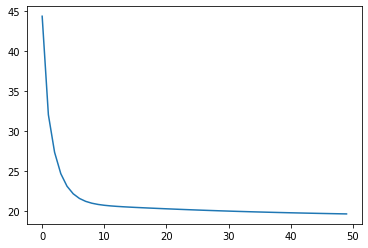

In [20]:
plt.plot(loss_list)

### 应用模型预测

In [21]:
n = np.random.randint(506)
print(n)
x_test = x_data[n]

x_test = x_test.reshape(1,12)
predict = sess.run(pred, feed_dict={x: x_test})
print("预测值:%f" % predict)
target = y_data[n]
print("标签值:%f" % target)

329
预测值:20.835022
标签值:22.600000
